In [1]:
import numpy as np
import pandas as pd
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    pass


In [2]:
train = pd.read_csv("/kaggle/input/grand-xray-slam-division-b/train2.csv")

In [3]:
train.shape

(108494, 21)

In [4]:
train.head(10)

,Image_name,Patient_ID,Study,Sex,Age,ViewCategory,ViewPosition,Atelectasis,Cardiomegaly,Consolidation,...,Enlarged Cardiomediastinum,Fracture,Lung Lesion,Lung Opacity,No Finding,Pleural Effusion,Pleural Other,Pneumonia,Pneumothorax,Support Devices
0,00000003_001_001.jpg,3,1,Male,41.0,Frontal,AP,0,1,0,...,1,0,0,1,0,0,0,0,0,0
1,00000004_001_001.jpg,4,1,Female,20.0,Frontal,PA,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,00000004_001_002.jpg,4,1,Female,20.0,Lateral,Lateral,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,00000006_001_001.jpg,6,1,Female,42.0,Frontal,AP,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,00000010_001_001.jpg,10,1,Female,50.0,Frontal,PA,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,00000010_001_002.jpg,10,1,Female,50.0,Lateral,Lateral,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,00000013_001_001.jpg,13,1,Male,36.0,Frontal,PA,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7,00000013_001_002.jpg,13,1,Male,36.0,Lateral,Lateral,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8,00000019_004_001.jpg,19,4,Female,50.0,Frontal,AP,1,0,1,...,0,1,0,1,0,1,1,1,1,0
9,00000019_003_001.jpg,19,3,Female,46.0,Frontal,AP,1,0,1,...,0,1,1,1,0,0,1,1,0,0


In [5]:
print(train.iloc[0])

Image_name                    00000003_001_001.jpg
Patient_ID                                       3
Study                                            1
Sex                                           Male
Age                                           41.0
ViewCategory                               Frontal
ViewPosition                                    AP
Atelectasis                                      0
Cardiomegaly                                     1
Consolidation                                    0
Edema                                            1
Enlarged Cardiomediastinum                       1
Fracture                                         0
Lung Lesion                                      0
Lung Opacity                                     1
No Finding                                       0
Pleural Effusion                                 0
Pleural Other                                    0
Pneumonia                                        0
Pneumothorax                   

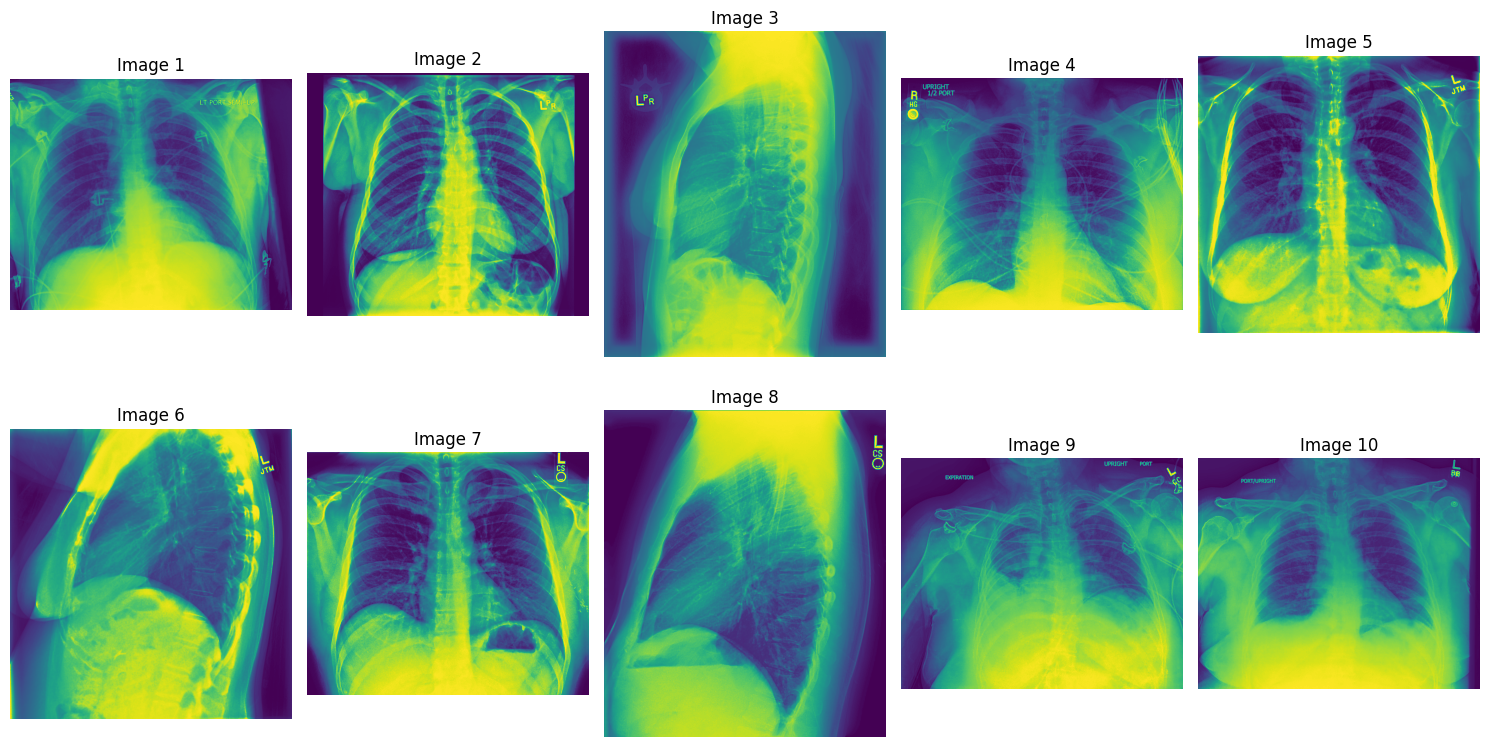

In [6]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("/kaggle/input/grand-xray-slam-division-b/train2/00000003_001_001.jpg")
plt.figure(figsize=(15, 8))
for i in range(10):
    img_path = train.iat[i, 0]  # assuming this column has full image paths or filenames
    if not img_path.startswith('/'):  # if only filename is given
        img_path = f"/kaggle/input/grand-xray-slam-division-b/train2/{img_path}"
    img = Image.open(img_path)

    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Image {i+1}")

plt.tight_layout()
plt.show()

In [7]:
print(train.iat[0, 0])

00000003_001_001.jpg


In [8]:
!pip install transformers
!pip install huggingface_hub
!pip install qwen_vl_utils

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.6/39.6 MB 38.2 MB/s eta 0:00:00:00:0100:01


In [9]:
# from GetModelList import get_qwen_models
import huggingface_hub
# from my_timer import MyTimer, my_timer
from transformers import Qwen2_5_VLForConditionalGeneration, AutoTokenizer, AutoProcessor
from qwen_vl_utils import process_vision_info

2025-10-06 13:37:38.153961: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759757858.471300      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759757858.566637      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [10]:
model = Qwen2_5_VLForConditionalGeneration.from_pretrained(
    "Qwen/Qwen2.5-VL-3B-Instruct",torch_dtype="auto",device_map="auto"
)

config.json: 0.00B [00:00, ?B/s]

model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/3.98G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/3.53G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/216 [00:00<?, ?B/s]

In [11]:
processor = AutoProcessor.from_pretrained("Qwen/Qwen2.5-VL-3B-Instruct")

preprocessor_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

You have video processor config saved in `preprocessor.json` file which is deprecated. Video processor configs should be saved in their own `video_preprocessor.json` file. You can rename the file or load and save the processor back which renames it automatically. Loading from `preprocessor.json` will be removed in v5.0.


chat_template.json: 0.00B [00:00, ?B/s]

In [ ]:
image_path = "/kaggle/input/grand-xray-slam-division-b/train2/" + train.iat[8, 0]
# view_category = train.iat[0, 5]
# view_position = train.iat[0, 6]
prompt_template ='''You are given a chest X-ray image. Analyze the image carefully and identify which of the following thoracic conditions are present.

Possible Conditions and Visual Indicators:

Atelectasis – The black portion of the lungs appears reduced.

Cardiomegaly – Cardiothoracic ratio is increased.

Consolidation – Small circular white patches are visible in the lungs.

Edema – “Bat wing” appearance connected to the sternum or midline.

Enlarged Cardiomediastinum – Heart width greater than half of thoracic width.

Fracture – Break or discontinuity visible in white ribs.

Lung Lesion – Small circular black dots or hazy regions due to blood.

Lung Opacity – White or grayish area in the lung field.

Pleural Effusion – Costophrenic angle is obliterated.

Pleural Other – Opaque stripe or “cap” in the upper chest.

Pneumonia – White spots or consolidation/infiltrates in the lungs.

Pneumothorax – One side of lung field appears more black; if both sides affected, everything except ribs looks black.

Support Device – Tube-like structure visible.

No Finding - None of the above can be seen.

Instructions:

Examine the given chest X-ray image.

Identify and list only the conditions visible.

Output only the condition names, separated by commas.

If no condition is visible, output exactly: No Finding.

Do not include any explanations or extra text.'''

In [36]:
prompt = prompt_template.format(view_category=view_category, view_position=view_position)

# Prepare messages for Qwen
messages = [
    {
        "role": "user",
        "content": [
            {"type": "image", "image": Image.open(image_path).resize((512, 512))},
            {"type": "text", "text": prompt}
        ]
    }
]

In [37]:
print(messages)

[{'role': 'user', 'content': [{'type': 'image', 'image': <PIL.Image.Image image mode=L size=512x512 at 0x7E73D6C15590>}, {'type': 'text', 'text': 'You are given a chest X-ray image. Analyze the image carefully and identify which of the following thoracic conditions are present.\n\nPossible Conditions and Visual Indicators:\n\nAtelectasis – The black portion of the lungs appears reduced.\n\nCardiomegaly – Cardiothoracic ratio is increased.\n\nConsolidation – Small circular white patches are visible in the lungs.\n\nEdema – “Bat wing” appearance connected to the sternum or midline.\n\nEnlarged Cardiomediastinum – Heart width greater than half of thoracic width.\n\nFracture – Break or discontinuity visible in white ribs.\n\nLung Lesion – Small circular black dots or hazy regions due to blood.\n\nLung Opacity – White or grayish area in the lung field.\n\nPleural Effusion – Costophrenic angle is obliterated.\n\nPleural Other – Opaque stripe or “cap” in the upper chest.\n\nPneumonia – White 

In [38]:
text = processor.apply_chat_template(
    messages, tokenize=False, add_generation_prompt=True
)

In [39]:
image_inputs, video_inputs = process_vision_info(messages)

In [40]:
inputs = processor(
    text = [text],
    images = image_inputs,
    videos = video_inputs,
    padding = True,
    return_tensors = "pt"
)

In [41]:
generated_ids = model.generate(**inputs,max_new_tokens=64)

In [42]:
generated_ids_trimmed = [
    out_ids[len(in_ids) :] for in_ids, out_ids in zip(inputs["input_ids"],generated_ids)
]

In [43]:
output_text = processor.batch_decode(
    generated_ids_trimmed, skip_special_tokens=True, clean_up_tokenizations_spaces=False
)

In [44]:
print(output_text)

['No Finding']


In [24]:
# test_folder = "/kaggle/input/grand-xray-slam-division-b/test2"
# image_files = [f for f in os.listdir(test_folder) if f.lower().endswith((".jpg", ".png", ".jpeg"))]

In [25]:
# import os
# import pandas as pd
# from PIL import Image
# from math import ceil
# from tqdm import tqdm

# test_folder = "/kaggle/input/grand-xray-slam-division-b/test2"
# image_files = [f for f in os.listdir(test_folder) if f.lower().endswith((".jpg", ".png", ".jpeg"))]

# prompt_template = """
# You are given a chest X-ray image.

# The possible thoracic conditions are:
# Atelectasis, Cardiomegaly, Consolidation, Edema, Enlarged Cardiomediastinum, Fracture, Lung Lesion, Lung Opacity, No Finding, Pleural Effusion, Pleural Other, Pneumonia, Pneumothorax, Support Devices

# Instructions:
# - Output only the condition names separated by commas.
# - If no condition is clearly visible, output exactly: No Finding.
# - Do not write any explanations, reasoning, or extra text.
# """

# batch_size = 4  # Adjust based on GPU memory
# results = []

# num_batches = ceil(len(image_files) / batch_size)

# for i in tqdm(range(num_batches)):
#     batch_files = image_files[i*batch_size : (i+1)*batch_size]
#     images = []
#     messages_list = []

#     for image_name in batch_files:
#         image_path = os.path.join(test_folder, image_name)
#         img = Image.open(image_path).convert("RGB").resize((224, 224))  # smaller size saves memory
#         images.append(img)

#         messages = [
#             {
#                 "role": "user",
#                 "content": [
#                     {"type": "image", "image": img},
#                     {"type": "text", "text": prompt_template}
#                 ]
#             }
#         ]
#         text = processor.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)
#         messages_list.append(text)

#     # Prepare processor inputs
#     inputs = processor(
#         text=messages_list,
#         images=images,
#         padding=True,
#         return_tensors="pt"
#     )

#     # Generate predictions
#     generated_ids = model.generate(**inputs, max_new_tokens=64)
#     output_texts = processor.batch_decode(
#         generated_ids,
#         skip_special_tokens=True,
#         clean_up_tokenizations_spaces=True
#     )

#     # Save results
#     results.extend([t.strip() for t in output_texts])

#     # Optional: save partial CSV every 1000 images
#     if (i+1) % (1000 // batch_size) == 0:
#         temp_df = pd.DataFrame({"Image_name": image_files[:len(results)], "Label": results})
#         temp_df.to_csv("submission_partial.csv", index=False)

# # Final CSV
# submission_df = pd.DataFrame({"Image_name": image_files, "Label": results})
# submission_df.to_csv("submission.csv", index=False)
# print("submission.csv created!")


KeyboardInterrupt: 